# Lasso, Ridge, ElasticNet

In [1]:
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [3]:
boston=load_boston()


In [5]:
df=pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df['price']=boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
X=df.drop('price', axis=1)
y=df.price

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [9]:
#modelos

linreg=LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
lasso=Lasso()
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [11]:
ridge=Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [12]:
elastic=ElasticNet()
elastic.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [13]:
train_score=linreg.score(X_train, y_train)    # R2
test_score=linreg.score(X_test, y_test)
print (train_score, test_score)

0.720587035208675 0.7750368224678431


In [14]:
train_score=lasso.score(X_train, y_train)
test_score=lasso.score(X_test, y_test)
print (train_score, test_score)

0.6550679482210249 0.6370548162738527


In [15]:
train_score=ridge.score(X_train, y_train)
test_score=ridge.score(X_test, y_test)
print (train_score, test_score)

0.7179823115349706 0.773783924687844


In [16]:
train_score=elastic.score(X_train, y_train)
test_score=elastic.score(X_test, y_test)
print (train_score, test_score)

0.670763147899029 0.6674443935383241


# SVR

In [18]:
import warnings
warnings.simplefilter('ignore')

from sklearn.svm import SVR

svr=SVR()
svr.fit(X_train, y_train)

train_score=svr.score(X_train, y_train)
test_score=svr.score(X_test, y_test)
print (train_score, test_score)

0.15557322924925565 -0.116632472950426


# Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor as RFR

rf=RFR()
rf.fit(X_train, y_train)

train_score=rf.score(X_train, y_train)
test_score=rf.score(X_test, y_test)
print (train_score, test_score)

0.9685342658969299 0.8895110278018619


In [21]:
#help(RFR())

# GridSearching

In [22]:
from sklearn.model_selection import GridSearchCV


def grid(modelo, param, cv=5):
    grid=GridSearchCV(modelo, param, cv=cv, 
                      iid=True, return_train_score=True, n_jobs=-1)
    
    grid.fit(X_train, y_train)
    
    print('Acierto test: {:.2f}'.format(grid.score(X_test, y_test)))
    print('Acierto train: {:.2f}'.format(grid.score(X_train, y_train)))
    print('Mejores parametros: {}'.format(grid.best_params_))
    print('Mejor acierto cv: {:.2f}'.format(grid.best_score_))
    
    return grid.best_estimator_.fit(X_train, y_train)

In [23]:
param={'max_leaf_nodes':[5,10,20], 'n_estimators':[10,50,100,500]}

In [24]:
grid(rf, param)

Acierto test: 0.91
Acierto train: 0.94
Mejores parametros: {'max_leaf_nodes': 20, 'n_estimators': 50}
Mejor acierto cv: 0.82


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=20,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [25]:
modelo=grid(rf, param)

Acierto test: 0.91
Acierto train: 0.93
Mejores parametros: {'max_leaf_nodes': 20, 'n_estimators': 100}
Mejor acierto cv: 0.82


In [26]:
modelo.predict(X_test)

array([17.01216494, 43.69377832, 33.24848263, 13.39055944, 20.59528625,
       27.5681412 , 21.24525113, 42.52350608, 22.54510166, 24.1524939 ,
       22.40312389, 19.24554236, 25.98670672, 26.26136559, 29.77292083,
       45.33752894, 20.6745306 , 14.69578621, 22.64591979, 20.8546063 ,
       28.47448325, 25.98940554, 38.51934787,  9.0066527 , 15.16915515,
       23.90366292, 23.74104243, 20.6008961 , 20.11675536, 18.79240107,
       43.97858514, 22.52198982, 19.4771734 , 19.73855197, 26.43432452,
       22.66922748, 33.07634735, 24.33359005, 19.61950119, 23.98277685,
       19.95158214, 45.20306813, 46.0716324 , 35.10018375, 45.9226921 ,
       23.86452006,  9.98257318, 22.38903048, 32.98991985, 15.46674256,
       19.86138068, 23.97206733, 25.9386355 , 25.03195824, 20.95576707,
       17.57286281, 33.53771076, 19.99797608, 13.76630271, 19.2975693 ,
       19.06784898, 45.23485014, 20.75151628, 14.02579388, 20.28678185,
       15.21886868, 23.77187433, 22.67104304, 23.84373582, 44.99

# Extratrees

In [29]:
from sklearn.tree import ExtraTreeRegressor as ETR

etr=ETR()
etr.fit(X_train, y_train)

train_score=etr.score(X_train, y_train)
test_score=etr.score(X_test, y_test)
print (train_score, test_score)

1.0 0.840286635853755


# Arboles, Random Forest Classifier

In [32]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier as DTC

In [33]:
dt=DTC()
dt.fit(load_iris().data, load_iris().target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(418.5, 747.4499999999999, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(354.11538461538464, 611.55, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(482.8846153846154, 611.55, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(257.53846153846155, 475.65, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(128.76923076923077, 339.74999999999994, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(64.38461538461539, 203.8499999999999, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(193.15384615384616, 203.8499999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(386.3076923076923, 339.74999999999994, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(321.9230769230769, 203.8499999999999, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(450.69230769230774, 203.8499999999999, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(386.3076923

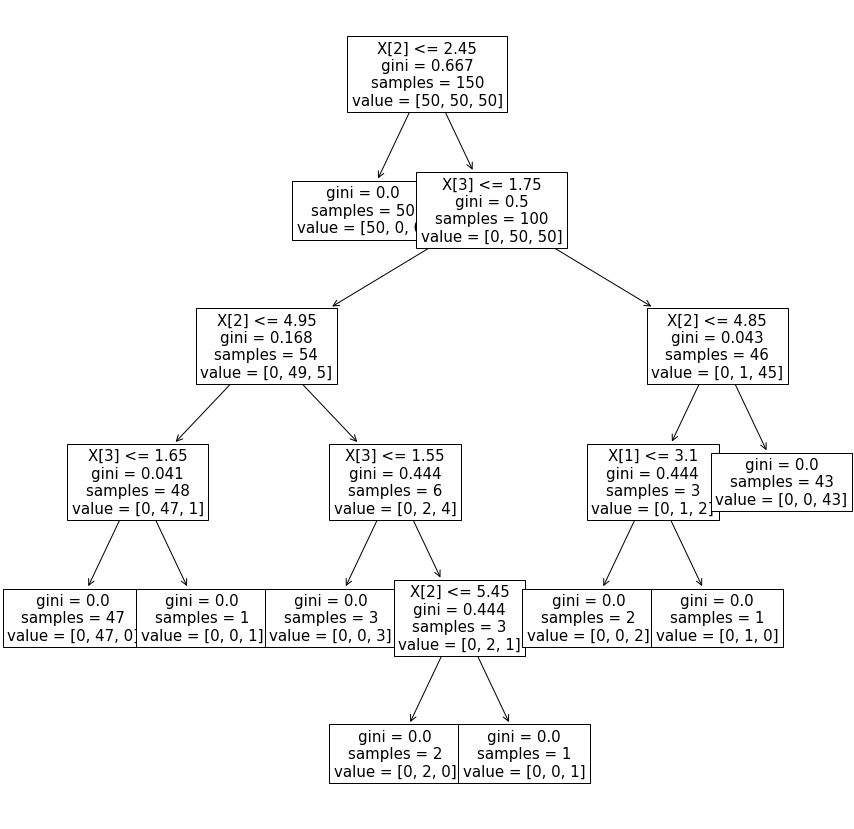

In [36]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15))
plot_tree(dt, fontsize=15)

In [37]:
from sklearn.ensemble import RandomForestClassifier as RFC

X_train, X_test, y_train, y_test=train_test_split(load_iris().data, load_iris().target)


rf=RFC()
rf.fit(X_train, y_train)

train_score=rf.score(X_train, y_train)
test_score=rf.score(X_test, y_test)
print (train_score, test_score)

0.9910714285714286 1.0


# SVC

In [38]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(X_train, y_train)

train_score=svc.score(X_train, y_train)
test_score=svc.score(X_test, y_test)
print (train_score, test_score)

0.9821428571428571 1.0


# Random GridSearching

In [44]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier as RFC


X,y=make_circles(noise=0.2, factor=0.5, random_state=1)

In [45]:
n_estimators=[int(x) for x in np.linspace(200, 2000, 10)]
max_features=['auto', 'sqrt']
max_depth=[int(x) for x in np.linspace(10, 110, 11)]
max_depth.append(None)
bootstrap=['True', 'False']

In [46]:
param={'n_estimators':n_estimators,
       'max_features':max_features,
       'max_depth':max_depth,
       'bootstrap':bootstrap}

In [47]:
rf=RFC()

In [50]:
rf_random=RandomizedSearchCV(estimator=rf, param_distributions=param,
                            n_iter=100, cv=3, verbose=10, n_jobs=-1, scoring='roc_auc')

rf_random.fit(X,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [51]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap='True', class_weight=None, criterion='gini',
                       max_depth=90, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
rf_random.best_score_

0.8886029411764705

In [53]:
rf_random.best_params_

{'n_estimators': 1200,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': 'True'}

In [54]:
rf_random.cv_results_

{'mean_fit_time': array([2.75259725, 3.27384599, 2.75755874, 3.21592641, 2.39397931,
        1.92842301, 1.43439921, 1.93445039, 5.01823576, 0.49061664,
        5.06388545, 0.49563917, 0.49093731, 0.50152818, 3.53581301,
        3.02043978, 4.23151835, 5.27915311, 2.12998033, 1.0693864 ,
        4.23339764, 4.29590042, 3.25325632, 3.28926539, 2.19025962,
        5.06055721, 4.55327765, 2.25734266, 2.29384891, 5.74801064,
        5.15477872, 5.72916142, 2.81172069, 4.12153657, 4.74932869,
        1.15096553, 1.78807298, 5.96000735, 1.79627275, 5.35472139,
        4.12512374, 0.59509428, 3.58742372, 3.07793323, 3.92572037,
        6.68685412, 0.6400973 , 1.31426589, 4.80657101, 6.24154298,
        1.99716663, 2.80919274, 0.71125937, 1.40348927, 0.74693735,
        2.11656729, 6.80245304, 1.40456533, 1.39337738, 6.71498203,
        1.9924318 , 0.66354187, 5.98523736, 3.3310686 , 2.6393857 ,
        6.64317544, 3.29614075, 5.99149386, 1.31149141, 4.78141904,
        3.42107979, 6.77994108,